## clean
## OHE
## EDA
## KNN
## Logistic regression
## decision tree
## random forest
- build different models and see how they do at predicting the target
## voter classifier ensamble, which ever one is the best, fine tune with hyperparameters
## move to URL

reference-https://machinelearningmastery.com/voting-ensembles-with-python/

# Heart Failure Prediction Dataset
### 11 clinical features for predicting heart disease events.
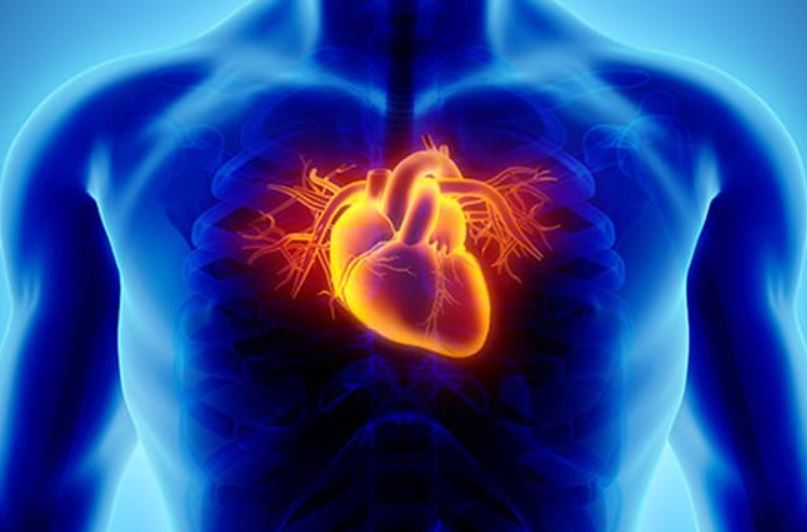

## Features
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal] (TARGET)

### OUR TARGET is HeartDisease

#### This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:
- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

- Total: 1190 observations
- Duplicated: 272 observations
- Final dataset: 918 observations


In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


import warnings

C:\Users\jason\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data has categorical and numeric features

Look for missing data and null values

In [5]:
df.shape

(918, 12)

In [6]:
print(pd.__version__)

1.3.5


In [7]:
# no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## No missing values

In [8]:
# no null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## No Nulll Values

## Exploratory Data Analysis

In [9]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [10]:
df.HeartDisease.value_counts()
# 508 with heart disease
#410 without heart disease

1    508
0    410
Name: HeartDisease, dtype: int64

Number of HeartDisease(1) vs normal(0) is nearly balanced

In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == np.object]
cards = [len(df[col].unique()) for col in cat_cols]

Text(0.5, 1.0, 'Categorical Features')

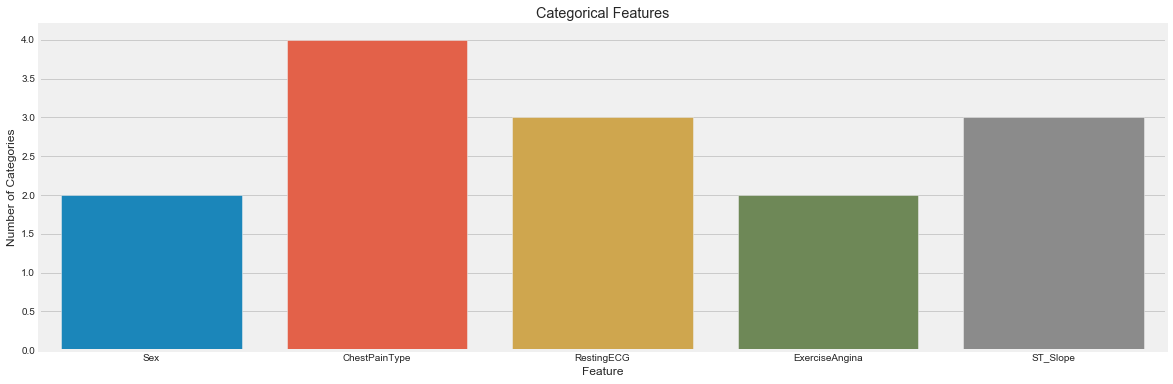

In [13]:
fig,ax = plt.subplots(figsize=(18,6))
sns.barplot(x=cat_cols, y=cards)
ax.set_xlabel('Feature')
ax.set_ylabel('Number of Categories')
ax.set_title('Categorical Features')

# Target HeartDisease relatively balanced between Heart Disease (1) and no Heart Disease (0)

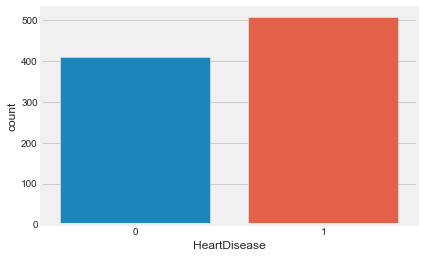

In [14]:
ax = sns.countplot(x="HeartDisease", data=df)

## More men had heart disease then females and Men made up a majority of the study

In [15]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

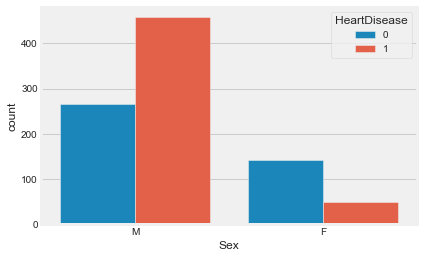

In [16]:
sns.countplot(x ='Sex', hue = "HeartDisease", data = df)

# Feature Selection

In [17]:
df_numeric = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]

In [18]:
df_numeric.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.00,0
1,49,160,180,0,156,1.00,1
2,37,130,283,0,98,0.00,0
3,48,138,214,0,108,1.50,1
4,54,150,195,0,122,0.00,0


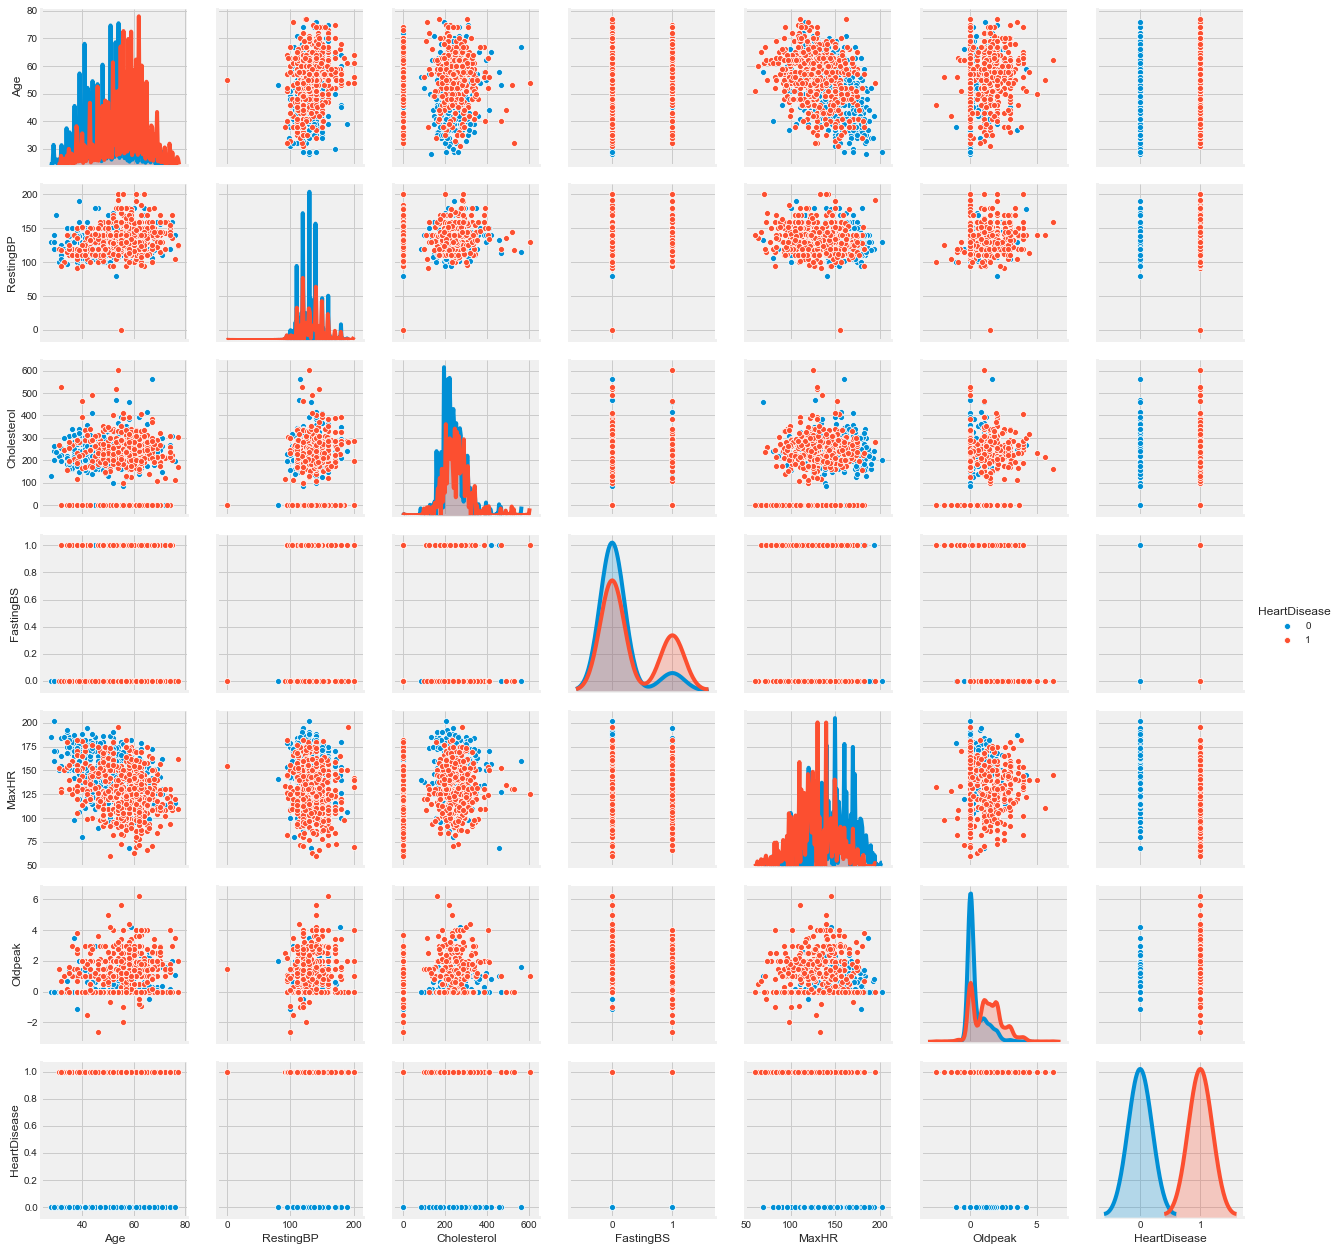

In [19]:
sns.pairplot(df_numeric, hue = 'HeartDisease', diag_kws={'bw': 0.2})  #looking for good separation (distinction of classes)

### No Clear separation for numeric features

## Define X, y

# Train Test Split

In [20]:
X = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

# OHE Using a Transformer

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
from sklearn.compose import make_column_transformer

In [25]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope']),
                                     remainder = 'passthrough')  

In [26]:
X_train_ohe = transformer.fit_transform(X_train)

In [27]:
X_test_ohe = transformer.transform(X_test)

# Baseline

In [28]:
df['HeartDisease'].value_counts(normalize = True)

1   0.55
0   0.45
Name: HeartDisease, dtype: float64

### Baseline Accuracy: Heart Disease 55%

# Scale the data (X_train_ohe, X_test_ohe)

In [29]:
sscaler= StandardScaler()

In [30]:
X_train_scaled=sscaler.fit_transform(X_train_ohe)
X_test_scaled = sscaler.transform(X_test_ohe)

# KNN Estimator

### Instantiate KNN and fit

In [31]:
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)   

### score

In [32]:
knn.score(X_train_scaled, y_train)

0.876453488372093

## KNN 87.4% Accuracy Score

In [33]:
knn.score(X_test_scaled, y_test)  

0.8782608695652174

87.8% correct guesses

Cross Validation

In [34]:
cross_val_score(knn, X_train_scaled, y_train) 

array([0.82608696, 0.86231884, 0.8115942 , 0.84671533, 0.78832117])

### KNN Cross val accuracy scores better than baseline

## KNN Grid Search

In [35]:
X_test.shape[0]

230

In [36]:
params = {'n_neighbors': range(1, len(X_test) - 1, 2)} 

In [37]:
grid = GridSearchCV(knn, param_grid=params, cv = 5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 229, 2)})

In [38]:
grid.best_params_

{'n_neighbors': 47}

Best number of neighbors: 47

In [39]:
#y = np.where(y == 0, 1, 0) to switch the 1 and 0

### Confusion Matrix

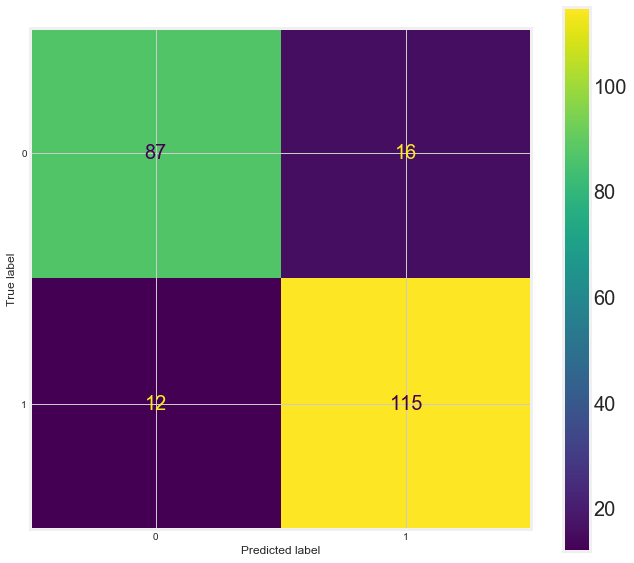

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.rcParams.update({'font.size': 20})
ConfusionMatrixDisplay.from_estimator(grid, X_test_scaled, y_test,
                                     display_labels=df.HeartDisease, ax=ax);
#sns.set(font_scale=3.0) # Adjust to fit

16 False Negatives (Type 2 errors) indicated. This is bad, for we don't want to tell a patient that they don't have heart diease when they do have heart disease. We'll try a different model. 

# Logistic Regression

Import Logistic Regression estimator

In [41]:
lgr = LogisticRegression(max_iter=1000) 

Adjust C-parameter

In [42]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

In [43]:
lgr_grid = GridSearchCV(lgr, param_grid=param_grid, 
                       cv = 5)
lgr_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]})

In [44]:
print(lgr_grid.score(X_test_scaled, y_test))

0.8869565217391304


In [45]:
lgr_grid.best_params_

{'C': 0.01}

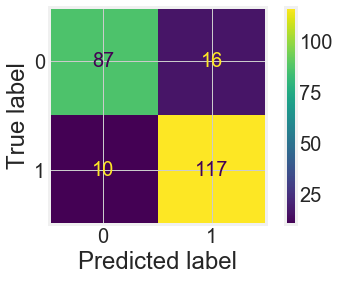

In [46]:
ConfusionMatrixDisplay.from_estimator(lgr_grid, X_test_scaled, y_test)

Still have 16 False Negatives

# Change scoring from accuracy to recall

In [47]:
lgr_grid = GridSearchCV(lgr, param_grid=param_grid, 
                       cv = 5, scoring = 'recall')
lgr_grid.fit(X_train_scaled, y_train)    #fit on scaled data

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             scoring='recall')

In [48]:
lgr_grid.best_params_

{'C': 0.01}

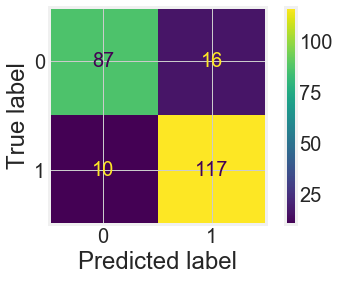

In [49]:
ConfusionMatrixDisplay.from_estimator(lgr_grid, X_test_scaled, y_test)

# Decision Tree

In [51]:
dtree = DecisionTreeClassifier(max_depth = 2).fit(X_train_scaled, y_train)

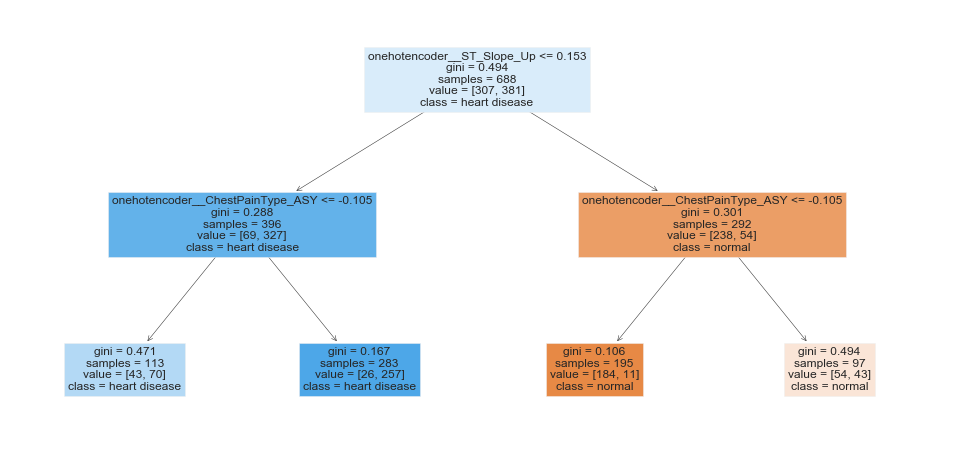

In [52]:
fig, ax = plt.subplots(figsize = (15, 8))
plot_tree(dtree, feature_names=transformer.get_feature_names_out(), #if version < 1.0 .get_feature_names()
         fontsize = 12, ax = ax, filled = True, class_names = ['normal', 'heart disease']);

ST_slope most important feature interms of heart disease

In [53]:
dtree.feature_importances_ 

array([0.        , 0.19222943, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.80777057, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [54]:
importance_df = pd.DataFrame({'importance': dtree.feature_importances_,
                              'features': transformer.get_feature_names_out()})
importance_df

,importance,features
0,0.00,onehotencoder__Sex_M
1,0.19,onehotencoder__ChestPainType_ASY
2,0.00,onehotencoder__ChestPainType_ATA
3,0.00,onehotencoder__ChestPainType_NAP
4,0.00,onehotencoder__ChestPainType_TA
5,0.00,onehotencoder__RestingECG_LVH
6,0.00,onehotencoder__RestingECG_Normal
7,0.00,onehotencoder__RestingECG_ST
8,0.00,onehotencoder__ExerciseAngina_Y
9,0.00,onehotencoder__ST_Slope_Down


1st most important feture: ST_Slope UP
2nd most important feature: Chest pain type ASY

### confusion matrix

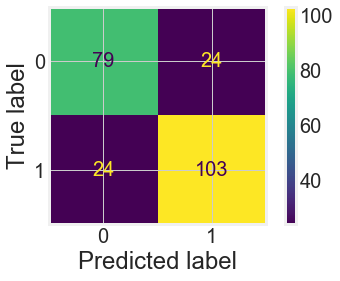

In [55]:
ConfusionMatrixDisplay.from_estimator(dtree, X_test_scaled, y_test)   # or look at the X_train

## # Grid Search the max depth for the decision tree

In [56]:
params_tree = {'max_depth': [2, 3, 4, 5, 6]}

In [57]:
grid_tree = GridSearchCV(dtree, param_grid=params_tree, scoring = 'recall')

In [58]:
grid_tree.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, scoring='recall')

In [59]:
grid_tree.best_params_

{'max_depth': 2}

In [60]:
print(grid_tree.score(X_test_scaled, y_test))

0.8110236220472441


Best tree depth is 3

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_tree, X_test_scaled, y_test)

# ensembles

# Modeling

## Baseline

# KNN classifier (use (classification metrics starter notebook)

## features and target (X, y)

## create train test split (stratify it)

scale your features   (classification metrics starter notebook)
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

## scale the data

###KNN instantiate and fit ((classification metrics starter notebook))

Confusion matrix

## grid search to find the best parameter

## create the model

## use cross val scores

# logistic regression classifier

# combine all models